In [1]:
using LinearAlgebra
using Plots
using Random

In [2]:
Random.seed!(1234)
n = 10
M = randn(n, n)
U, Σ, Vt = svd(M)
A = U * triu(randn(n, n)) * U';  # Schur form (all real)

In [3]:
max_iter = 100
tol = 1e-13

1.0e-13

In [4]:
T = A
norms_no_shift = []
for k = 1:max_iter
    Q, R = qr(T)
    T = R * Q
    v = norm(vec(T[n, 1:n-1]))
    @show k, v
    push!(norms_no_shift, v)
    if v < tol; break; end
end 

(k, v) = (1, 0.008249148311550917)
(k, v) = (2, 0.0007266577957841023)
(k, v) = (3, 0.0007723929566316495)
(k, v) = (4, 0.00036708927839232863)
(k, v) = (5, 0.00015729677334476973)
(k, v) = (6, 6.217221939222692e-5)
(k, v) = (7, 2.365462164511919e-5)
(k, v) = (8, 8.80089162972525e-6)
(k, v) = (9, 3.233988555082124e-6)
(k, v) = (10, 1.1799019411003796e-6)
(k, v) = (11, 4.2873377010946e-7)
(k, v) = (12, 1.554249978531237e-7)
(k, v) = (13, 5.627038600425511e-8)
(k, v) = (14, 2.0356922972961408e-8)
(k, v) = (15, 7.361369850699778e-9)
(k, v) = (16, 2.661335536284141e-9)
(k, v) = (17, 9.62012528231192e-10)
(k, v) = (18, 3.4771852402425885e-10)
(k, v) = (19, 1.2567695192003435e-10)
(k, v) = (20, 4.54226543104652e-11)
(k, v) = (21, 1.6416598342593065e-11)
(k, v) = (22, 5.9332181462518255e-12)
(k, v) = (23, 2.1443489704975667e-12)
(k, v) = (24, 7.74996032019464e-13)
(k, v) = (25, 2.8009338498002547e-13)
(k, v) = (26, 1.0122921317910241e-13)
(k, v) = (27, 3.658547212653052e-14)


In [5]:
T = A
norms_shift = []
for k = 1:max_iter
    μ = T[n, n]
    Q, R = qr(T - μ * I)
    T = R * Q + μ * I
    v = norm(vec(T[n, 1:n-1]))
    @show k, v
    push!(norms_shift, v)
    if v < tol; break; end
end 

(k, v) = (1, 0.062143292567545805)
(k, v) = (2, 0.4178015143464829)
(k, v) = (3, 0.08068532623359154)
(k, v) = (4, 0.11042974745194746)
(k, v) = (5, 0.010466441741462811)
(k, v) = (6, 0.00020717625169974852)
(k, v) = (7, 9.08790243087299e-8)
(k, v) = (8, 1.709664145709406e-14)


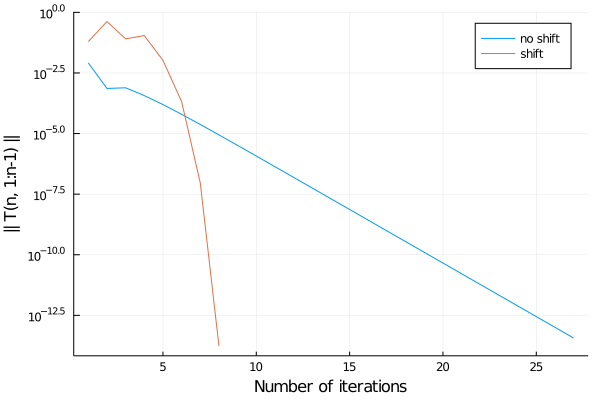

In [6]:
plot!(norms_no_shift, label="no shift", yscale=:log10)
plot!(norms_shift, label="shift", yscale=:log10)
xlabel!("Number of iterations")
ylabel!("|| T(n, 1:n-1) ||")